## 📊 Navigating Workforce Dynamics: An In-Depth Exploration of Employee Turnover and Predictive Insights 🚀

## 1. 🧾 Executive Summary

In our quest to discern the underlying reasons for employee turnover and contribute to mitigating such occurrences, our journey led us through a data-driven odyssey. Here's a concise overview of the comprehensive efforts we invested:

#### 🧹 Data Preprocessing:
In our endeavor to understand and mitigate employee turnover, we embarked on a meticulous data preprocessing journey. This involved delving into a rich dataset containing crucial employee information, including features such as job satisfaction, performance reviews, average monthly working hours, promotions, and more. Our initial steps included handling missing values, eliminating duplicates, and ensuring data integrity.

#### 🔍 Exploratory Data Analysis (EDA):
During the Exploratory Data Analysis (EDA) phase, we utilized tools like Pearson's correlation and descriptive statistics to uncover essential connections between different factors such as promotions, reviews, and projects. This analytical journey provided valuable insights into the underlying patterns and relationships within the dataset.

#### 📈 Regression Modeling:
To discern the variables most indicative of employee departure, we applied both linear and logistic regression models. Our goal was to understand the impact of factors such as job satisfaction, reviews, and working hours on attrition risk. Through regression analysis, we gained valuable insights into the relationships between these features and the likelihood of employees leaving the company.

#### 🔄 Clustering Analysis:
Building upon our regression analysis, we employed specific features—review, satisfaction, and avg_hrs_month—to conduct clustering. This segmentation enabled us to identify distinct employee groups based on shared characteristics. Our exploration revealed that a three-group clustering solution yielded the most cohesive and meaningful results. Supported by silhouette, calinski-harabasz, and davies-bouldin scores, this insight laid the groundwork for our subsequent analysis and interpretation, enhancing our understanding of the workforce landscape.

#### 📝 Conclusion:
In conclusion, our comprehensive analysis addressed critical questions regarding employee turnover. We identified departments with the highest and lowest turnover rates and investigated variables that proved to be better predictors of employee departure. Leveraging the patterns and trends uncovered during our analysis, we provided actionable recommendations aimed at reducing employee turnover and fostering a more stable and productive workforce environment.

## 2. 📖 Background

The Board of a large corporation is worried about the relatively high employee turnover. This project will look for ways to reduce the number of employees leaving the company, providing insights on why this is happening and on what groups are departing and suggesting what can be done to resolve the problem.

## 3. 💾 The Data

The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

> #### Features description:

- `department` - the department the employee belongs to.
- `promoted` - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- `review` - the composite score the employee received in their last evaluation.
- `projects` - how many projects the employee is involved in.
- `salary` - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- `tenure` - how many years the employee has been at the company.
- `satisfaction` - a measure of employee satisfaction from surveys.
- `bonus` - 1 if the employee received a bonus in the previous 24 months, 0 otherwise. 
- `avg_hrs_month` - the average hours the employee worked in a month.
- `left` - "yes" if the employee ended up leaving, "no" otherwise.

In [1]:
import numpy as np  # Fundamental package for scientific computing
import pandas as pd  # Data manipulation and analysis library
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Data visualization library based on matplotlib
from scipy.stats import zscore  # For calculating z-scores
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Standardization of features
from sklearn.linear_model import LinearRegression, LogisticRegression  # Linear and logistic regression models
from sklearn.feature_selection import SelectFromModel  # Feature selection based on model importance
from sklearn.cluster import KMeans  # KMeans clustering algorithm
from sklearn.metrics import accuracy_score, classification_report, silhouette_score, calinski_harabasz_score, davies_bouldin_score  # Clustering and Regression evaluation metrics

sns.set_style('darkgrid')  # Set the default style for seaborn plots

In [2]:
# Loading the employee churn dataset from the specified CSV file and displaying the first few rows for initial inspection
raw_data = pd.read_csv('./employee_churn_data.csv')
raw_data.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [3]:
# Creating a copy of the raw_data for analysis
churn_analysis_df = raw_data.copy()

## 4. 🧹 Data Preprocessing

In [4]:
# Number of rows and columns in the dataset
rows, cols = churn_analysis_df.shape

# Number of distinct departments in the dataset
num_departments = churn_analysis_df['department'].nunique()

# Displaying dataset dimensions and the count of distinct departments
print(f'Dataset Dimensions:\n\n'
      f'Number of Entries per Employee: {rows}\n'
      f'Number of Features: {cols}\n'
      f'Number of Distinct Departments: {num_departments}')

Dataset Dimensions:

Number of Entries per Employee: 9540
Number of Features: 10
Number of Distinct Departments: 10


In [5]:
# Display concise summary information about the DataFrame
churn_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


The dataset consists of _**9540 rows**_ and _**10 columns**_, confirming our initial observation of its shape. Additionally, the `info()` output reveals that there are _**no missing values in any of the columns**_, eliminating the need for imputation or dropping.

Noteworthy points:
- The columns `salary` and `department` are categorical variables. </br>
- The `left` column, which signifies employee departure, is currently categorical with values '_**yes**_' and '_**no**_'. In order to facilitate numerical calculations and analyses, we are transforming this categorical variable into numeric values. This conversion will assign the value _**1**_ to indicate '_**yes**_' (employee departure) and _**0**_ to denote '_**no**_' (employee staying). This numeric representation will streamline computations and enable a more straightforward interpretation of the data in subsequent analyses.


#### 4.1 Handling Duplicate Records

In [6]:
# Checking for and displaying duplicate entries in the entire DataFrame
# Duplicates are identified and counted
duplicates = churn_analysis_df.duplicated()

# Displaying the count of duplicates and the duplicate rows, if any
print(f'Number of Duplicates: {duplicates.sum()}\n'
      f'\nDuplicate Rows: {churn_analysis_df[duplicates]}')

Number of Duplicates: 0

Duplicate Rows: Empty DataFrame
Columns: [department, promoted, review, projects, salary, tenure, satisfaction, bonus, avg_hrs_month, left]
Index: []


The dataset has been examined for duplicates, and the good news is that no duplicate rows were found. The entire dataset is unique, contributing to the reliability of our analysis.


#### 4.2 Handling Outliers

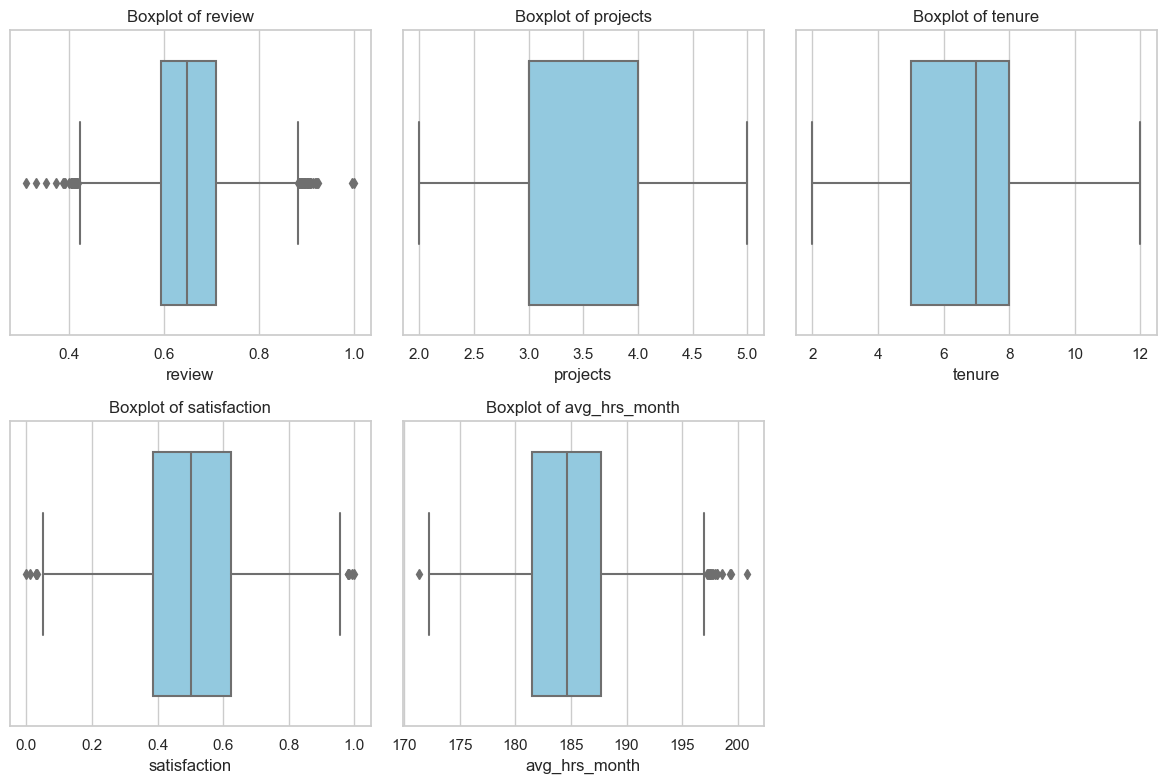

In [7]:
# Visualizing the distribution of numerical features using boxplots
# Selecting numerical columns of interest for boxplot visualization
numerical_columns = ['review', 'projects', 'tenure', 'satisfaction', 'avg_hrs_month']

# Creating subplots for each numerical column
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid") # Setting style for better visibility

# Looping through each numerical column to create individual boxplots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=churn_analysis_df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')

# Adjusting layout for better presentation
plt.tight_layout()
plt.show()

In [8]:
# Selecting numerical columns for Z-Score standardization
numerical_columns = ['review', 'projects', 'tenure', 'satisfaction', 'avg_hrs_month']

# Calculating Z-Scores for selected columns
z_scores = churn_analysis_df[numerical_columns].apply(zscore)

# Defining a Z-Score threshold for identifying outliers
z_score_threshold = 3.5

# Identifying and filtering out rows with outliers based on the Z-Score threshold
outliers_mask = (z_scores.abs() > z_score_threshold).any(axis=1)
churn_analysis_no_outliers_df = churn_analysis_df[~outliers_mask]

# Printing the dimensions before and after handling outliers
original_rows, original_cols = churn_analysis_df.shape
cleaned_rows, cleaned_cols = churn_analysis_no_outliers_df.shape

print(f'Original Dataset Dimensions: {original_rows} rows x {original_cols} columns')
print(f'Dataset Dimensions after Handling Outliers: {cleaned_rows} rows x {cleaned_cols} columns\n')

# Displaying count of observations exceeding the Z-Score threshold for each numerical column
for column in numerical_columns:
    outliers_count = (z_scores[column].abs() > z_score_threshold).sum()
    print(f'The {column} column has {outliers_count} observations with Z-scores greater than or equal to the threshold of {z_score_threshold}.')

Original Dataset Dimensions: 9540 rows x 10 columns
Dataset Dimensions after Handling Outliers: 9532 rows x 10 columns

The review column has 5 observations with Z-scores greater than or equal to the threshold of 3.5.
The projects column has 0 observations with Z-scores greater than or equal to the threshold of 3.5.
The tenure column has 1 observations with Z-scores greater than or equal to the threshold of 3.5.
The satisfaction column has 0 observations with Z-scores greater than or equal to the threshold of 3.5.
The avg_hrs_month column has 3 observations with Z-scores greater than or equal to the threshold of 3.5.


In [9]:
# Identifying and analyzing outliers in the 'review' column using Z-Score
# Creating a mask to locate rows with 'review' values exceeding the Z-Score threshold
review_outliers_mask = (z_scores['review'].abs() >= z_score_threshold)

# Extracting the rows containing outliers in the 'review' column
review_outliers_data = churn_analysis_df[review_outliers_mask]

# Displaying the minimum and maximum values in the 'review' column for the identified outliers
print('\nMin and Max Values in \'review\' for Outliers:')
print('Min:', review_outliers_data['review'].min())
print('Max:', review_outliers_data['review'].max())

# Displaying the values in the 'review' column for the identified outliers
print('\nValues in \'review\' for Outliers:')
print(review_outliers_data['review'].values)


Min and Max Values in 'review' for Outliers:
Min: 0.31
Max: 1.0

Values in 'review' for Outliers:
[0.99436317 1.         0.35168162 0.31       0.33047887]


In [10]:
# Identifying and analyzing outliers in the 'tenure' column using Z-Score
# Creating a mask to locate rows with 'tenure' values exceeding the Z-Score threshold
tenure_outliers_mask = (z_scores['tenure'].abs() >= z_score_threshold)

# Extracting the rows containing outliers in the 'tenure' column
tenure_outliers_data = churn_analysis_df[tenure_outliers_mask]

# Displaying the minimum and maximum values in the 'tenure' column for the identified outliers
print('\nMin and Max Values in \'tenure\' for Outliers:')
print('Min:', tenure_outliers_data['tenure'].min())
print('Max:', tenure_outliers_data['tenure'].max())

# Displaying the values in the 'tenure' column for the identified outliers
print('\nValues in \'tenure\' for Outliers:')
print(tenure_outliers_data['tenure'].values)


Min and Max Values in 'tenure' for Outliers:
Min: 12.0
Max: 12.0

Values in 'tenure' for Outliers:
[12.]


In [11]:
# Identifying and analyzing outliers in the 'avg_hrs_month' column using Z-Score
# Creating a mask to locate rows with 'avg_hrs_month' values exceeding the Z-Score threshold
avg_hrs_month_outliers_mask = (z_scores['avg_hrs_month'].abs() >= z_score_threshold)

# Extracting the rows containing outliers in the 'avg_hrs_month' column
avg_hrs_month_outliers_data = churn_analysis_df[avg_hrs_month_outliers_mask]

# Displaying the minimum and maximum values in the 'avg_hrs_month' column for the identified outliers
print('\nMin and Max Values in \'avg_hrs_month\' for Outliers:')
print('Min:', avg_hrs_month_outliers_data['avg_hrs_month'].min())
print('Max:', avg_hrs_month_outliers_data['avg_hrs_month'].max())

# Displaying the values in the 'avg_hrs_month' column for the identified outliers
print('\nValues in \'avg_hrs_month\' for Outliers:')
print(avg_hrs_month_outliers_data['avg_hrs_month'].values)


Min and Max Values in 'avg_hrs_month' for Outliers:
Min: 199.2977749953616
Max: 200.8616558715116

Values in 'avg_hrs_month' for Outliers:
[200.86165587 199.297775   199.37727265]


#### Conclusion: Handling Outliers

After a thorough analysis of the dataset to identify and assess outliers, the following conclusions have been drawn:

#### Review Column Outliers:
The `review` column outliers were found to have values within the desired range of **0** to **1**. These instances, with a **minimum value of 0.31** and a **maximum value of 1.0**, are consistent with the expected distribution for employee review scores. Therefore, these outliers are considered valid and will not be removed from the dataset.

#### Tenure Column Outliers:
The `tenure` column outliers were identified with a constant value of 12.0, representing 12 years of employment. This value is reasonable and does not deviate from expectations, especially in cases where employees have long tenures. Consequently, these outliers will be retained in the dataset.

#### Avg_hrs_month Column Outliers:
The `avg_hrs_month` column outliers displayed values within an acceptable range for average hours worked per month. With a **minimum value of 199.2977749953616** and a **maximum value of 200.8616558715116**, these outliers are realistic and may indicate instances of higher-than-average monthly working hours. Therefore, these outliers will be retained in the dataset.

In summary, after careful consideration of the context and characteristics of each feature, it has been decided not to remove the identified outliers. The values align with the expected ranges for employee-related metrics and do not exhibit characteristics that would warrant their exclusion from the analysis. Handling outliers requires a nuanced approach, taking into account domain knowledge and context-specific considerations.


#### 4.3 Converting Categorical Values to Numerical Representation

In [12]:
# Converting categorical values to numerical representation for better analysis

# Mapping 'left' column: 1 for 'yes' (employee left), 0 for 'no' (employee stayed)
churn_analysis_df['left'] = churn_analysis_df['left'].map({'yes': 1, 'no': 0})

# Mapping 'salary' column: 1 for 'low', 2 for 'medium', and 3 for 'high'
churn_analysis_df['salary'] = churn_analysis_df['salary'].map({'low': 1, 'medium': 2, 'high': 3})

# Rounding off selected numerical columns to 2 decimal places
columns_to_round = ['review', 'satisfaction', 'avg_hrs_month']
churn_analysis_df[columns_to_round] = churn_analysis_df[columns_to_round].round(2)

## 5. 🔍 Exploratory Data Analysis (EDA)

#### 5.1 Summary Statistics for Numerical Columns


After calculating summary statistics for various numerical columns in the dataset, a narrative unfolds, offering insights into different facets of employee engagement and organizational dynamics </br>.
- `Promotion Rate`: The `promoted` column indicates a **low mean of 0.03**, signifying that only a small percentage of employees **(3.03%)** received promotions in the past 24 months.
- `Employee Performance Review:` The `review` column has a **mean of 0.65**, indicating that, on average, employees received positive performance reviews.
- `Number of Projects:` Employees are generally engaged in multiple projects, with an average of **3.27 projects per employee**.
- `Salary Tiers:` The `salary` column's **mean of approximately 2.02** suggests that the majority of employees fall into the **medium** salary tier.
- `Tenure:` The `tenure` column reveals an **average tenure of 6.56 years**, with a relatively wide distribution **(standard deviation of 1.42)**, reflecting varied lengths of employment.
- `Job Satisfaction:` The `satisfaction` column has a **balanced mean of 0.50**, indicating a generally satisfactory level of job satisfaction among employees.
- `Bonus Reception:` The `bonus` column has a **mean of 0.21**, indicating that a relatively small percentage of employees **(21.21%)** received a bonus in the previous 24 months.
- `Average Monthly Hours:` The `avg_hrs_month` column shows an **average of 184.66 hours worked per month**, with a **standard deviation of 4.14**.
- `Employee Attrition:` The `left` column has a **mean of 0.29**, suggesting that approximately **29% of employees have left the company**.

In [13]:
churn_analysis_df.describe().T

,count,mean,std,min,25%,50%,75%,max
promoted,9540.0,0.030294,0.171403,0.00,0.00,0.00,0.00,1.00
review,9540.0,0.651843,0.085318,0.31,0.59,0.65,0.71,1.00
projects,9540.0,3.274843,0.579136,2.00,3.00,3.00,4.00,5.00
salary,9540.0,2.017505,0.553849,1.00,2.00,2.00,2.00,3.00
tenure,9540.0,6.556184,1.415432,2.00,5.00,7.00,8.00,12.00
satisfaction,9540.0,0.504617,0.158583,0.00,0.39,0.50,0.62,1.00
bonus,9540.0,0.212055,0.408785,0.00,0.00,0.00,0.00,1.00
avg_hrs_month,9540.0,184.661551,4.144797,171.37,181.47,184.63,187.73,200.86
left,9540.0,0.291824,0.454626,0.00,0.00,0.00,1.00,1.00


In [14]:
# Calculating summary statistics for numerical columns in the dataset

# Selecting all numerical columns in our dataset
numerical_columns = churn_analysis_df.select_dtypes(include='number').columns

# Iterating through the numerical columns
for col in numerical_columns:
    # Calculating the mode value for the current numerical column
    mode_value = churn_analysis_df[col].mode().iloc[0]  # Take the first mode if there are multiple modes
    # Displaying the calculated mode separately
    print(f"Calculated Mode for '{col}':{mode_value}")

Calculated Mode for 'promoted':0
Calculated Mode for 'review':0.64
Calculated Mode for 'projects':3
Calculated Mode for 'salary':2
Calculated Mode for 'tenure':6.0
Calculated Mode for 'satisfaction':0.43
Calculated Mode for 'bonus':0
Calculated Mode for 'avg_hrs_month':187.24
Calculated Mode for 'left':0


#### 5.2 Promotions, Bonuses, and Employee Churn Count

The resulting countplot visualization offers a clear representation of key metrics related to **promotions**, **bonuses**, and **employee turnover**, providing valuable insights into the organization's dynamics. A meager **3.03%** of employees, totaling **289 individuals out of 9540**, received promotions, indicating a discerning approach to employee advancement based on performance. In contrast, bonuses were more widely distributed, with approximately **21.21% of the workforce (2023 individuals)** enjoying additional incentives, potentially fostering motivation. However, the organization faced a challenge as around **29.18% of employees, totaling 2784 individuals**, **left** during this period, prompting a need for closer examination of factors contributing to employee exits. This collective insight is crucial for understanding the organization's dynamics, addressing employee satisfaction, and strategically managing workforce retention and development.

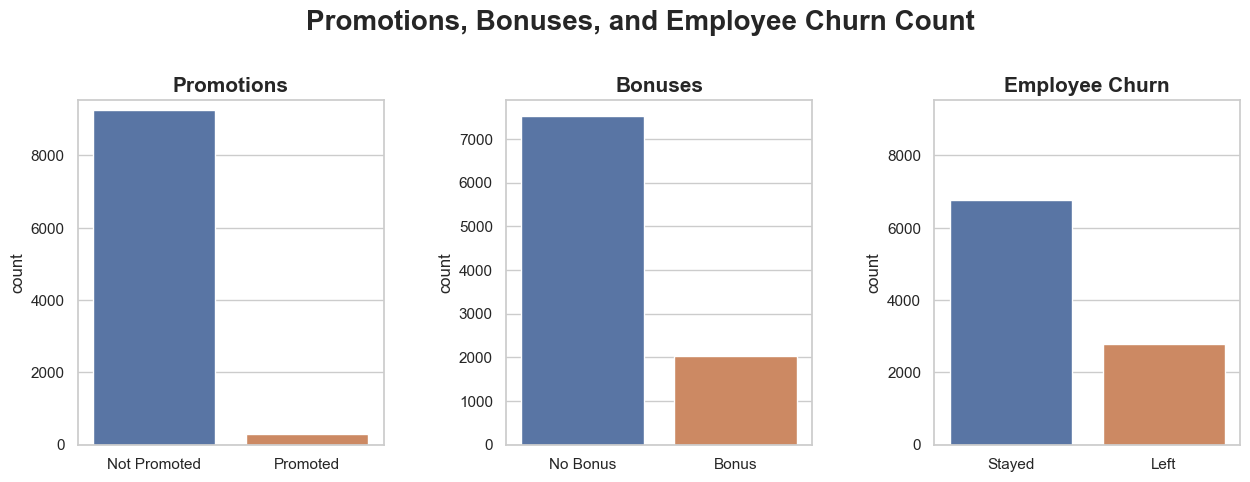


Count of Promotions: 289 from 9540 employees (3.03%)
Count of Bonuses: 2023 from 9540 employees (21.21%)
Employee Churn Counts: 2784 from 9540 employees (29.18%)


In [15]:
# Visualization of Promotions, Bonuses, and Employee Churn Count

# Creating subplots for promotions, bonuses, and employee churn
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.color_palette("Set2")

# Plotting Promotions
sns.countplot(data=churn_analysis_df, x='promoted', ax=ax[0])
ax[0].set_title('Promotions', fontsize=15, fontweight='bold')
ax[0].set_xlabel('')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Not Promoted', 'Promoted'])
ax[0].set_ylim(0, len(churn_analysis_df))

# Plotting Bonuses
sns.countplot(data=churn_analysis_df, x='bonus', ax=ax[1])
ax[1].set_title('Bonuses', fontsize=15, fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['No Bonus', 'Bonus'])

# Plotting Employee Turnover
sns.countplot(data=churn_analysis_df, x='left', ax=ax[2])
ax[2].set_title('Employee Churn', fontsize=15, fontweight='bold')
ax[2].set_xlabel('')
ax[2].set_xticks([0, 1])
ax[2].set_xticklabels(['Stayed', 'Left'])
ax[2].set_ylim(0, len(churn_analysis_df))

# Adjusting layout
plt.suptitle('Promotions, Bonuses, and Employee Churn Count', fontsize=20, fontweight='bold')
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.8, wspace=0.4, hspace=None)

plt.show()

# Calculating percentages of promotions, bonuses, and employee turnovers
promotions_percentage = churn_analysis_df['promoted'].value_counts(normalize=True).get(1, 0) * 100
bonuses_percentage = churn_analysis_df['bonus'].value_counts(normalize=True).get(1, 0) * 100
turnovers_percentage = churn_analysis_df['left'].value_counts(normalize=True).get(1, 0) * 100

# Displaying counts and percentages
print(f'\nCount of Promotions: {len(churn_analysis_df[churn_analysis_df["promoted"] == 1])} from {len(churn_analysis_df)} employees ({promotions_percentage:.2f}%)')
print(f'Count of Bonuses: {len(churn_analysis_df[churn_analysis_df["bonus"] == 1])} from {len(churn_analysis_df)} employees ({bonuses_percentage:.2f}%)')
print(f'Employee Churn Counts: {len(churn_analysis_df[churn_analysis_df["left"] == 1])} from {len(churn_analysis_df)} employees ({turnovers_percentage:.2f}%)')

#### 5.3 Scatter Plots for Variable Relationships

The **correlation analysis** unravels intricate relationships between key numerical variables. A strikingly robust positive correlation of **0.98** between **average monthly** **hours** and **tenure** signifies a strong alignment, suggesting that as tenure increases, average monthly hours worked also tends to rise. In contrast, a moderate negative correlation of **-0.35** reveals that **performance review scores** and **job satisfaction** often move in opposite directions, implying that higher review scores may not consistently translate to increased job satisfaction. Notably, a moderate positive correlation of **0.3** between **performance review scores** and **employee attrition** suggests that, on average, higher review scores may coincide with a higher likelihood of employee turnover. Additionally, weaker correlations, such as the **-0.2** correlation between **review scores** and **average monthly hours**, **-0.18** between **tenure** and **review scores**, and **-0.14** between **job satisfaction** and **average monthly hours**, provide nuanced insights into the interplay of these factors. These findings offer a valuable understanding of how various aspects of employee experience may influence one another within the organizational context.

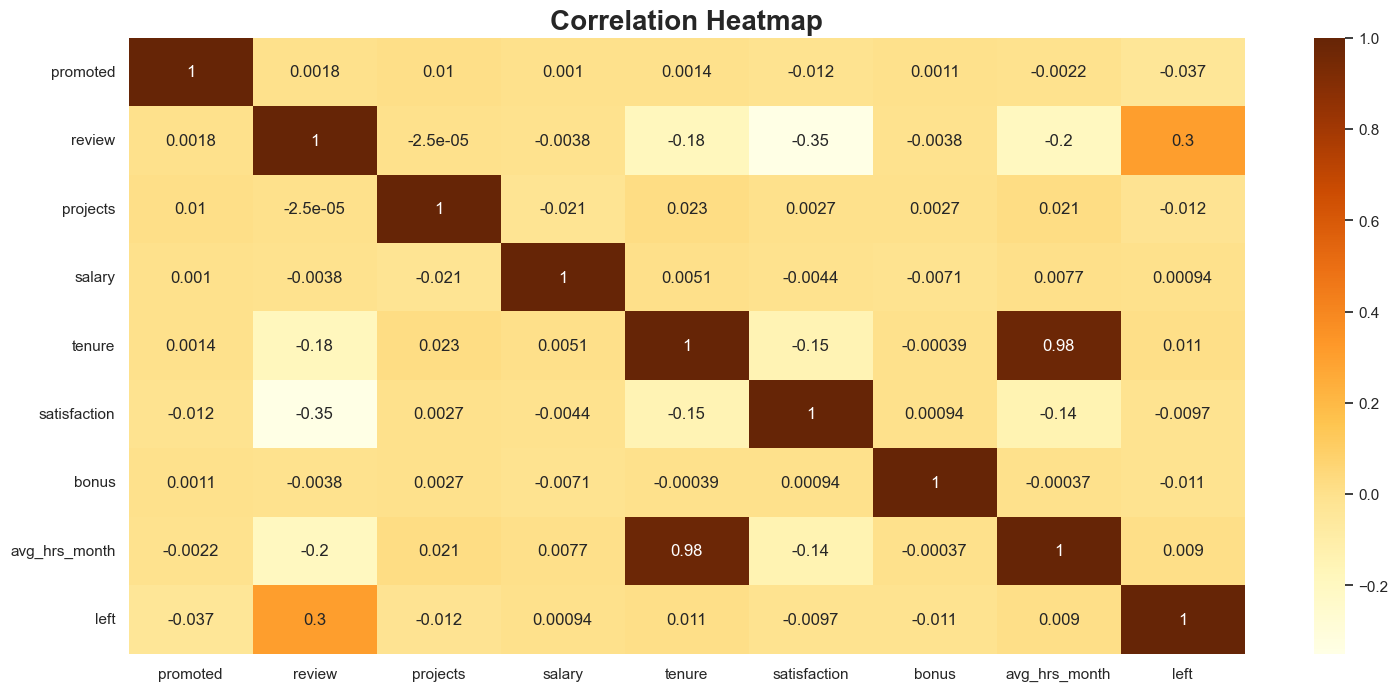


avg_hrs_month and tenure: Correlation Value: 0.98, very strong relationship, positive correlation, moves in the same direction

review and satisfaction: Correlation Value: -0.35, moderate relationship, negative correlation, moves in the opposite directions

review and left: Correlation Value: 0.3, moderate relationship, positive correlation, moves in the same direction

review and avg_hrs_month: Correlation Value: -0.2, weak relationship, negative correlation, moves in the opposite directions

tenure and review: Correlation Value: -0.18, weak relationship, negative correlation, moves in the opposite directions

satisfaction and avg_hrs_month: Correlation Value: -0.14, weak relationship, negative correlation, moves in the opposite directions


In [16]:
# Correlation analysis
correlation_matrix = churn_analysis_df.corr(numeric_only = True)

# Plotting the heatmap
cmap = sns.color_palette('YlOrBr', as_cmap=True)
plt.figure(figsize=(18, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap=cmap)
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold')
plt.show()

# Correlation interpretation
correlation_pairs = [
    ('avg_hrs_month', 'tenure'),
    ('review', 'satisfaction'),
    ('review', 'left'),
    ('review', 'avg_hrs_month'),
    ('tenure', 'review'),
    ('satisfaction', 'avg_hrs_month')
]

# Analyze and interpret correlations
for cols in correlation_pairs:
    correlation_value = round(churn_analysis_df[cols[0]].corr(churn_analysis_df[cols[1]]), 2)

    # Relationship interpretation
    if -0.05 <= correlation_value <= 0.05:
        relationship = 'no relationship'
    elif -0.25 <= correlation_value <= 0.25:
        relationship = 'weak relationship'
    elif -0.50 <= correlation_value <= 0.50:
        relationship = 'moderate relationship'
    elif -0.75 <= correlation_value <= 0.75:
        relationship = 'strong relationship'
    else:
        relationship = 'very strong relationship'

    # Correlation and behavior interpretation
    if correlation_value > 0.05:
        correlation_type = 'positive correlation'
        behavior = 'moves in the same direction'
    elif correlation_value < 0:
        correlation_type = 'negative correlation'
        behavior = 'moves in the opposite directions'
    else:
        correlation_type = 'no correlation'
        behavior = 'independent to each other'

    print(f"\n{cols[0]} and {cols[1]}: Correlation Value: {correlation_value}, {relationship}, {correlation_type}, {behavior}")


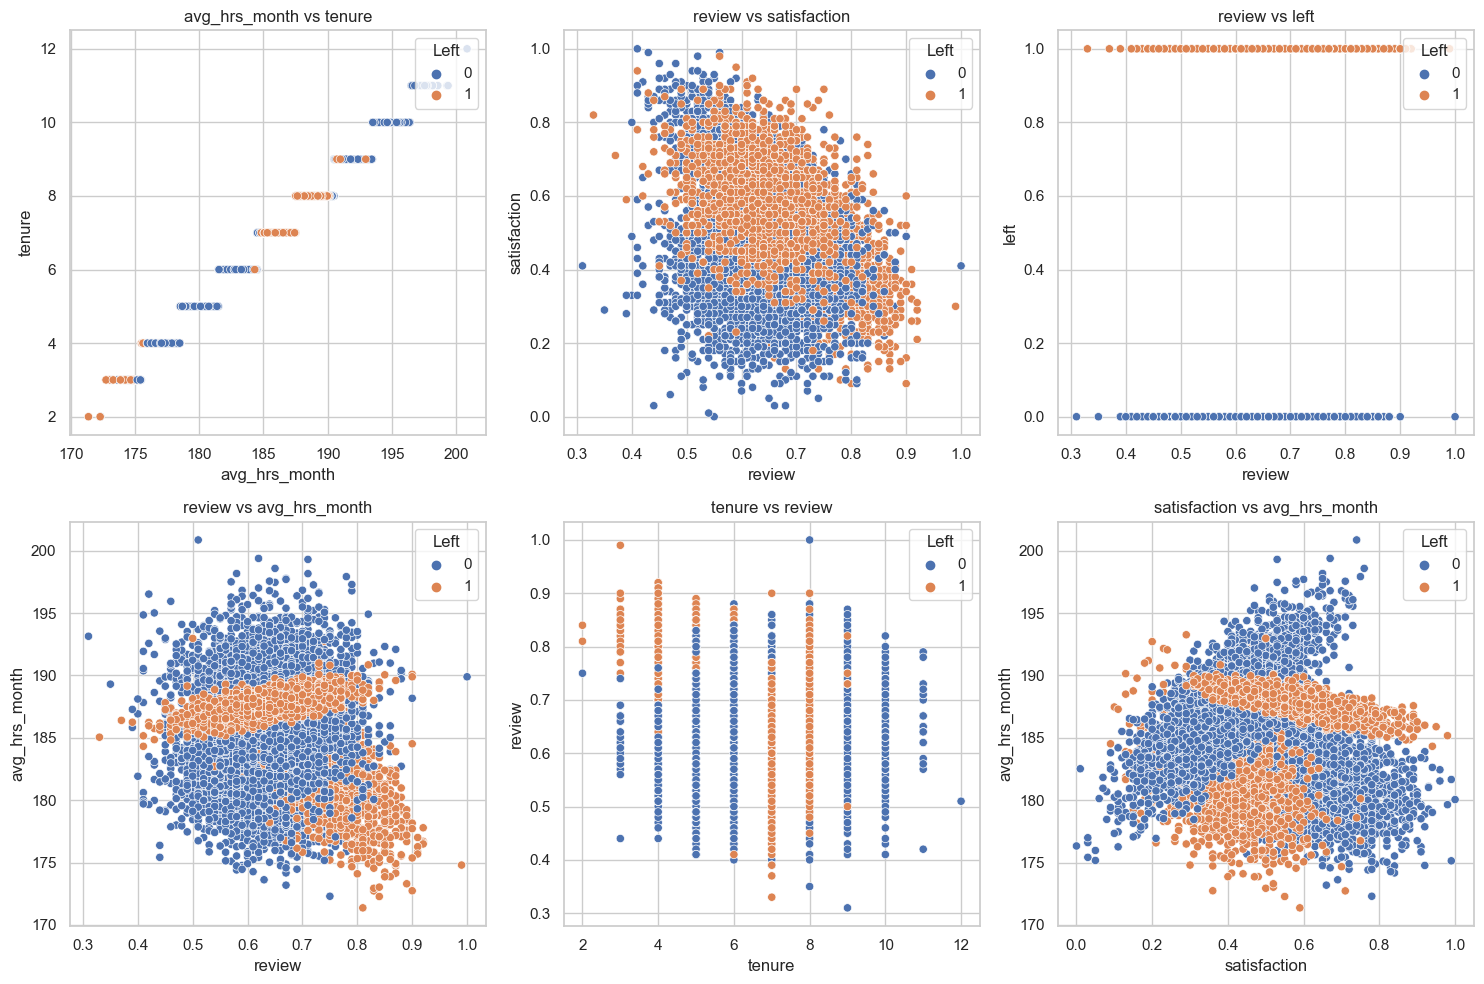

In [17]:
# Scatter Plot: avg_hrs_month vs tenure
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(data=churn_analysis_df, x='avg_hrs_month', y='tenure', hue='left')
plt.title('avg_hrs_month vs tenure')
plt.xlabel('avg_hrs_month')
plt.ylabel('tenure')
plt.legend(title='Left', loc='upper right')

# Scatter Plot: review vs satisfaction
plt.subplot(2, 3, 2)
sns.scatterplot(data=churn_analysis_df, x='review', y='satisfaction', hue='left')
plt.title('review vs satisfaction')
plt.xlabel('review')
plt.ylabel('satisfaction')
plt.legend(title='Left', loc='upper right')

# Scatter Plot: review vs left
plt.subplot(2, 3, 3)
sns.scatterplot(data=churn_analysis_df, x='review', y='left', hue='left')
plt.title('review vs left')
plt.xlabel('review')
plt.ylabel('left')
plt.legend(title='Left', loc='upper right')

# Scatter Plot: review vs avg_hrs_month
plt.subplot(2, 3, 4)
sns.scatterplot(data=churn_analysis_df, x='review', y='avg_hrs_month', hue='left')
plt.title('review vs avg_hrs_month')
plt.xlabel('review')
plt.ylabel('avg_hrs_month')
plt.legend(title='Left', loc='upper right')

# Scatter Plot: tenure vs review
plt.subplot(2, 3, 5)
sns.scatterplot(data=churn_analysis_df, x='tenure', y='review', hue='left')
plt.title('tenure vs review')
plt.xlabel('tenure')
plt.ylabel('review')
plt.legend(title='Left', loc='upper right')

# Scatter Plot: satisfaction vs avg_hrs_month
plt.subplot(2, 3, 6)
sns.scatterplot(data=churn_analysis_df, x='satisfaction', y='avg_hrs_month', hue='left')
plt.title('satisfaction vs avg_hrs_month')
plt.xlabel('satisfaction')
plt.ylabel('avg_hrs_month')
plt.legend(title='Left', loc='upper right')

plt.tight_layout()
plt.show()

## 6. 📈 Linear Regression Analysis

#### 6.1 Defining Features and Target Variable for Linear Regression

Our initial step in preparing for linear regression involved identifying the essential features and target variable. We selected a set of numeric features, including promotions, performance reviews, project involvement, tenure, job satisfaction, bonuses, and average monthly hours, collectively forming our feature matrix (`X_linreg`). The target variable, representing employee turnover, was isolated as `y_linreg`. This meticulous feature definition sets the stage for subsequent modeling steps.

In [ ]:
# Defining the numerical features and target variable for Linear Regression
numerical_columns_linreg = ['promoted', 'review', 'projects', 'tenure', 'satisfaction', 'bonus', 'avg_hrs_month']
X_linreg = churn_analysis_df[numerical_columns_linreg]
y_linreg = churn_analysis_df['left']

#### 6.2 Data Splitting

To evaluate the performance of our linear regression model, we divided our dataset into training and testing sets. The **train_test_split** function facilitated this partition, allocating 70% of the data for training (**X_train_linreg** and **y_train_linreg**) and the remaining 30% for testing (**X_test_linreg** and **y_test_linreg**). This strategic division ensures an unbiased assessment of the model's generalization capabilities.

In [ ]:
# Splitting the data into training and testing sets for Linear Regression
X_train_linreg, X_test_linreg, y_train_linreg, y_test_linreg = train_test_split(X_linreg, y_linreg, test_size=0.3, random_state=42)

#### 6.3 Standardization for Modeling

A crucial aspect of our data preparation process involved standardization. Specifically, we focused on standardizing key numeric attributes essential for our predictive modeling endeavor. These attributes encompassed critical factors such as promotions, performance reviews, project involvement, tenure, job satisfaction, bonuses, and average monthly hours. Standardizing these features using the **StandardScaler** ensures a uniform scale, enhancing the model's interpretability and effectiveness.

In [ ]:
# Standardizing the features using StandardScaler for Linear Regression
scaler_linreg = StandardScaler()
X_train_scaled_linreg = scaler_linreg.fit_transform(X_train_linreg)
X_test_scaled_linreg = scaler_linreg.transform(X_test_linreg)

#### 6.4 Model Fitting

With the data prepared and standardized, we proceeded to build our linear regression model. The **LinearRegression** model was employed to capture the relationships between the selected features and the target variable. By fitting the model to the training data (**X_train_scaled_linreg** and **y_train_linreg**), we aimed to uncover the underlying patterns and associations within the employee dataset.

In [ ]:
# Fitting a Linear Regression model
lr_model_linreg = LinearRegression()
lr_model_linreg.fit(X_train_scaled_linreg, y_train_linreg)

#### 6.5 Feature Selection

To enhance the interpretability of our linear regression model, we implemented feature selection. Leveraging the coefficients obtained from the trained model, the **SelectFromModel** method identified the most influential features. This strategic selection, represented by **X_train_selected_linreg** and **X_test_selected_linreg**, ensures that only the most impactful features contribute to the predictive power of our model.

In [ ]:
# Selecting features based on coefficients using SelectFromModel for Linear Regression
feature_selector_linreg = SelectFromModel(lr_model_linreg, threshold=-np.inf, max_features=5)  # Adjust threshold and max_features as needed
feature_selector_linreg.fit(X_train_scaled_linreg, y_train_linreg)

# Transforming the features based on the selected ones for Linear Regression
X_train_selected_linreg = feature_selector_linreg.transform(X_train_scaled_linreg)
X_test_selected_linreg = feature_selector_linreg.transform(X_test_scaled_linreg)

# Printing the selected features for Linear Regression
selected_features_linreg = X_linreg.columns[feature_selector_linreg.get_support()]
print("Selected Features (Linear Regression):", selected_features_linreg)

#### 6.6 Visualizing Feature Importance

An integral step in understanding the model's behavior involved visualizing feature importance. A bar plot was generated to showcase the coefficients associated with the selected features. This visual representation provides insights into the magnitude and directionality of each feature's impact on predicting employee turnover, aiding in the interpretation of the model's decision-making process.

In [ ]:
# Visualizing feature importance using a bar plot for Linear Regression
coefficients_linreg = lr_model_linreg.coef_
plt.figure(figsize=(10, 6))
plt.bar(selected_features_linreg, coefficients_linreg[feature_selector_linreg.get_support()])
plt.title("Feature Importance from Linear Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.show()


#### 6.7 Model Prediction and Evaluation

The culmination of our linear regression journey involved evaluating the model's performance on the testing set. Predictions (**y_pred_linreg**) were made based on the standardized features of the test data. The model's accuracy was assessed, and a comprehensive classification report was generated (**classification_report_str_linreg**). This final step offers a quantitative measure of the model's effectiveness in predicting employee turnover.

In [ ]:
# Evaluating performance on the selected features for Linear Regression
y_pred_linreg = lr_model_linreg.predict(X_test_scaled_linreg)
y_pred_binary_linreg = (y_pred_linreg > 0.5).astype(int)

# Calculating accuracy and displaying the classification report for Linear Regression
accuracy_linreg = accuracy_score(y_test_linreg, y_pred_binary_linreg)
classification_report_str_linreg = classification_report(y_test_linreg, y_pred_binary_linreg)

print(f"Accuracy on Test Set (Linear Regression): {accuracy_linreg:.4f}")
print("Classification Report (Linear Regression):\n", classification_report_str_linreg)

## 7. 📊 Logistic Regression Analysis

#### 7.1 Defining Features and Target Variable for Logistic Regression

Building upon the insights gained from linear regression, our exploration extends to logistic regression. We redefine our set of numeric features and target variable, emphasizing those most influential in predicting employee turnover. The features, including performance reviews, project involvement, job satisfaction, bonuses, and average monthly hours, are encapsulated in X_logreg, while y_logreg represents the binary classification of employees leaving or staying.

In [ ]:
# Defining the numerical features and target variable for Logistic Regression
numerical_columns_logreg = ['review', 'projects', 'satisfaction', 'bonus', 'avg_hrs_month']
X_logreg = churn_analysis_df[numerical_columns_logreg]
y_logreg = churn_analysis_df['left']

#### 7.2 Splitting Data for Logistic Regression

Continuing the sequential flow, our dataset is further partitioned into training and testing sets for logistic regression. The train_test_split function allocates 80% for training (X_train_logreg and y_train_logreg) and 20% for testing (X_test_logreg and y_test_logreg). This division ensures a robust assessment of the logistic regression model's performance.

In [39]:
# Splitting the data into training and testing sets
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X_logreg, y_logreg, test_size=0.2, random_state=42)

#### 7.3 Standardization for Logistic Regression

Adhering to the best practices established during linear regression, we prioritize the standardization of numeric attributes essential for logistic regression. Leveraging the StandardScaler, we ensure uniformity in the scales of pivotal factors such as performance reviews, project involvement, job satisfaction, bonuses, and average monthly hours. This uniform scaling enhances the model's interpretability and effectiveness.

In [38]:
# Standardizing the features using StandardScaler for Logistic Regression
scaler_logreg = StandardScaler()
X_train_scaled_logreg = scaler_logreg.fit_transform(X_train_logreg)
X_test_scaled_logreg = scaler_logreg.transform(X_test_logreg)

#### 7.4 Fitting Logistic Regression Model

Embarking on the logistic regression journey, we employ the LogisticRegression model to capture intricate relationships between selected features and the binary outcome of employee turnover. Fitting the model to the standardized training data (X_train_scaled_logreg and y_train_logreg), we delve into uncovering patterns specific to the likelihood of employee departure.

In [37]:
# Fitting a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled_logreg, y_train_logreg)

LogisticRegression()

#### 7.5 Feature Selection based on Coefficients

Continuing our commitment to feature selection, we employ coefficients obtained from the logistic regression model. The SelectFromModel method identifies the most impactful features, as reflected in X_train_selected_logreg and X_test_selected_logreg. This strategic selection ensures that only influential features contribute to the predictive power of our logistic regression model.

In [36]:
# Selecting features based on coefficients using SelectFromModel for Logistic Regression
feature_selector_logreg = SelectFromModel(logreg_model, threshold=0.2)
feature_selector_logreg.fit(X_train_scaled_logreg, y_train_logreg)

# Transforming the features based on the selected ones for Logistic Regression
X_train_selected_logreg = feature_selector_logreg.transform(X_train_scaled_logreg)
X_test_selected_logreg = feature_selector_logreg.transform(X_test_scaled_logreg)

#### 7.6 Visualizing Feature Importance

To enrich our understanding of the logistic regression model, we visualize feature importance using a bar plot. The plot showcases the coefficients associated with the selected features, offering insights into the magnitude and directionality of each feature's impact on predicting employee turnover. This visual aid facilitates a comprehensive interpretation of our logistic regression model.

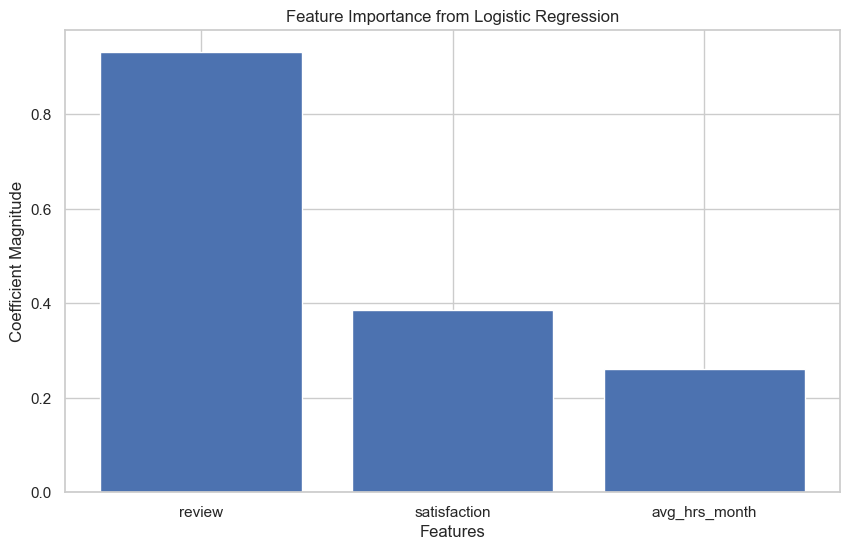

In [35]:
# Visualizing feature importance using a bar plot for Logistic Regression
coefficients_logreg = logreg_model.coef_.flatten()
selected_features_logreg = X_logreg.columns[feature_selector_logreg.get_support()]
plt.figure(figsize=(10, 6))
plt.bar(selected_features_logreg, coefficients_logreg[feature_selector_logreg.get_support()])
plt.title("Feature Importance from Logistic Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.show()

#### 7.7 Evaluating Logistic Regression Model Performance

The culmination of our logistic regression analysis involves evaluating the model's performance on the testing set. Predictions (y_pred_logreg) are made based on the standardized features of the test data, and accuracy metrics are calculated. A detailed classification report (classification_report_str_logreg) provides a nuanced assessment of the logistic regression model's effectiveness in predicting employee turnover.

In [34]:
# Evaluating performance on the selected features for logistic regression
y_pred_logreg = logreg_model.predict(X_test_scaled_logreg)

# Calculating accuracy and displaying the classification report for Linear Regression
accuracy_logreg = accuracy_score(y_test_logreg, y_pred_logreg)
classification_report_str_logreg = classification_report(y_test_logreg, y_pred_logreg)

print(f"\nAccuracy on Test Set (Logistic Regression): {accuracy_logreg:.4f}")
print("Classification Report (Logistic Regression):\n", classification_report_str_logreg)


Accuracy on Test Set (Logistic Regression): 0.7374
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.75      0.95      0.83      1330
           1       0.68      0.26      0.37       578

    accuracy                           0.74      1908
   macro avg       0.71      0.60      0.60      1908
weighted avg       0.72      0.74      0.69      1908



**Key Predictors of Employee Turnover**

Our analysis using linear and logistic regression models reveals essential factors influencing employee turnover. Leading the list is the performance review scores (`review`), emerging as the most consistent predictor in both models. Following closely, the average monthly hours worked (`avg_hrs_month`) secures the second position in linear regression and holds the third spot in logistic regression. Additionally, job satisfaction (`satisfaction`) ranks as the third factor in linear regression and advances to the second position in logistic regression.

Now armed with these predictors, our next step involves leveraging these features to conduct clustering. This will enable us to discern which department has the highest and lowest employee turnover.


## 8. 🧩 Clustering Analysis (KMeans)

#### 8.1 Feature Selection for Clustering

Our journey into clustering commences with the meticulous definition of features crucial for the task at hand. Leveraging insights gained from both linear and logistic regression analyses, we strategically select features that have proven significance in predicting employee behavior. Focusing on essential aspects such as performance `reviews`, `job satisfaction`, and `average monthly hours`, we construct the feature set encapsulated in X. These attributes, derived from our regression analyses, lay the foundation for uncovering meaningful patterns within our employee dataset.The selected features include:

In [47]:
# Defining the features for clustering
features = ['review', 'satisfaction', 'avg_hrs_month']
X = churn_analysis_df[features]

#### 8.2 Standardization for Clustering

Ensuring uniformity and comparability in our clustering analysis, we undertake the vital step of standardizing our features. Leveraging the StandardScaler, we transform our feature set (X) to possess a consistent scale. This standardized representation becomes instrumental in the subsequent clustering process.

In [40]:
# Standardizing the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 8.3 Exploring Optimal Cluster Numbers

Embarking on a quest for optimal clustering, we systematically explore a range of cluster numbers. Employing KMeans clustering with varying cluster counts, we evaluate and compare clustering scores, including the Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Score. The resulting scores are visualized to pinpoint the most suitable number of clusters for our analysis.

In [ ]:
# Setting the random seed for reproducibility
seed_random = 42

# Initializing dictionaries to store fitted models and labels for different cluster numbers
fitted_kmeans = {}
labels_kmeans = {}

# Initializing a list to store clustering scores
df_scores = []

# Defining the range of cluster numbers to try
k_values_to_try = np.arange(2, 31)

# Iterating over different cluster numbers to find the optimal one
for n_clusters in k_values_to_try:
    # Performing KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed_random, n_init=10)
    labels_clusters = kmeans.fit_predict(X_scaled)

    # Saving fitted model and cluster labels for reference
    fitted_kmeans[n_clusters] = kmeans
    labels_kmeans[n_clusters] = labels_clusters

    # Calculating clustering scores and saving them
    silhouette = silhouette_score(X_scaled, labels_clusters)
    ch = calinski_harabasz_score(X_scaled, labels_clusters)
    db = davies_bouldin_score(X_scaled, labels_clusters)

    # Creating a dictionary for clustering scores
    tmp_scores = {
        "n_clusters": n_clusters,
        "silhouette_score": silhouette,
        "calinski_harabasz_score": ch,
        "davies_bouldin_score": db,
    }

    # Appending the dictionary to the list
    df_scores.append(tmp_scores)

# Creating a DataFrame of clustering scores using `n_clusters` as the index for easier plotting
df_scores = pd.DataFrame(df_scores)
df_scores.set_index("n_clusters", inplace=True)

#### 8.3.1 Visualization of Clustering Scores

Visualizing the scores provides valuable insights into the performance of different cluster numbers. We examine the **Silhouette Score**, **Calinski-Harabasz Score**, and **Davies-Bouldin Score** individually through insightful line plots.

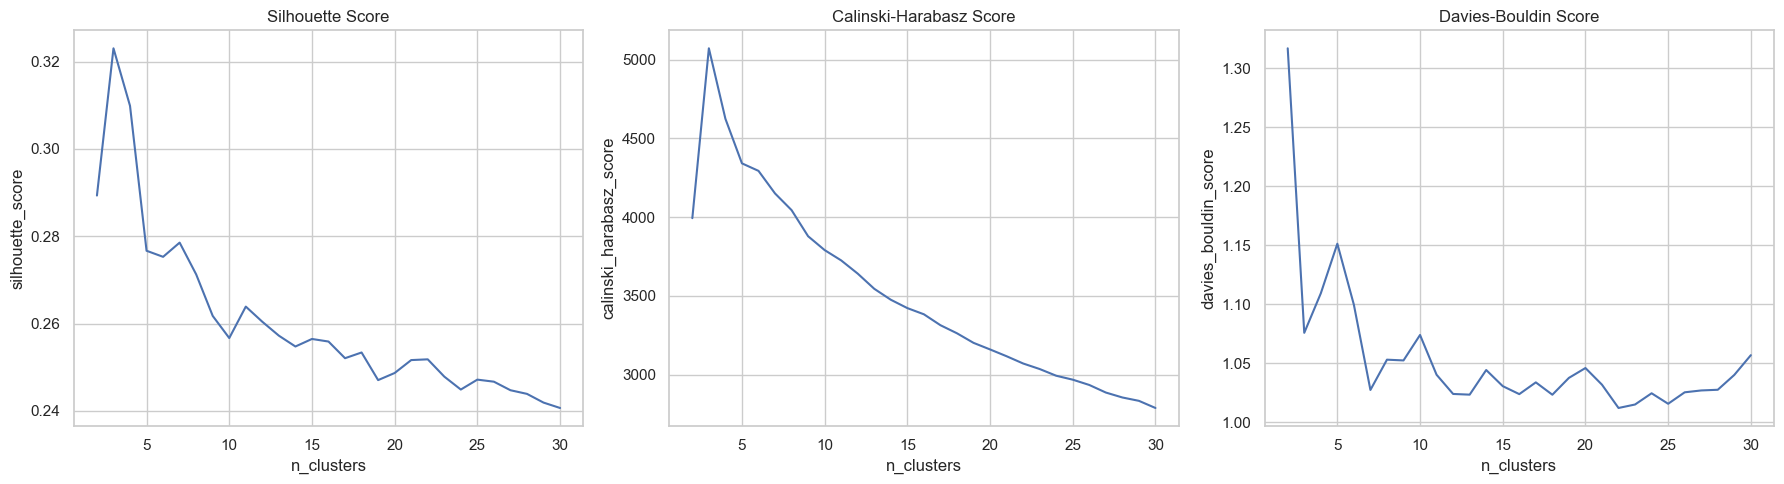

In [22]:
# Creating subplots for clustering scores visualization
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plotting the Silhouette Score over different cluster numbers
sns.lineplot(x=df_scores.index, y='silhouette_score', data=df_scores, ax=axes[0])
axes[0].set_title('Silhouette Score')

# Plotting the Calinski-Harabasz Score over different cluster numbers
sns.lineplot(x=df_scores.index, y='calinski_harabasz_score', data=df_scores, ax=axes[1])
axes[1].set_title('Calinski-Harabasz Score')

# Plotting the Davies-Bouldin Score over different cluster numbers
sns.lineplot(x=df_scores.index, y='davies_bouldin_score', data=df_scores, ax=axes[2])
axes[2].set_title('Davies-Bouldin Score')

# Adjusting layout for better visualization
plt.tight_layout()

# Displaying the plots
plt.show()

#### 8.3.2 Optimal Cluster Number Determination

Next, we identify the cluster number that maximizes each clustering score. The Silhouette Score and Calinski-Harabasz Score play a crucial role in guiding our choice of the optimal number of clusters.

In [23]:
# Finding the values that maximize each clustering score
best_silhouette = df_scores['silhouette_score'].idxmax()
best_calinski_harabasz = df_scores['calinski_harabasz_score'].idxmax()
best_davies_bouldin = df_scores['davies_bouldin_score'].idxmin()

# Printing the cluster numbers that result in the maximum scores
print(f"Best Silhouette Score: {best_silhouette}")
print(f"Best Calinski-Harabasz Score: {best_calinski_harabasz}")
print(f"Best Davies-Bouldin Score: {best_davies_bouldin}")

Best Silhouette Score: 3
Best Calinski-Harabasz Score: 3
Best Davies-Bouldin Score: 22


Upon analyzing the clustering scores, it is evident that both the **Silhouette Score** and **Calinski-Harabasz Score** point to **3** as the optimal number of clusters. Therefore, we will proceed with using **3 clusters** for our analysis. The Davies-Bouldin Score, while providing additional insight, is not the primary factor guiding our choice of clusters in this case.


#### 8.4 Cluster Assignment and Visualization

Armed with the knowledge of the optimal cluster count, we employ KMeans clustering with three clusters. The dataset is enriched with a 'cluster' column, indicating the assigned cluster for each employee. A scatter plot showcases the distribution of employees across clusters, providing a visual representation of our clustering outcome.

C:\Users\User\AppData\Local\Temp\ipykernel_8672\3622979071.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centers = churn_analysis_df.groupby('cluster_label').mean()


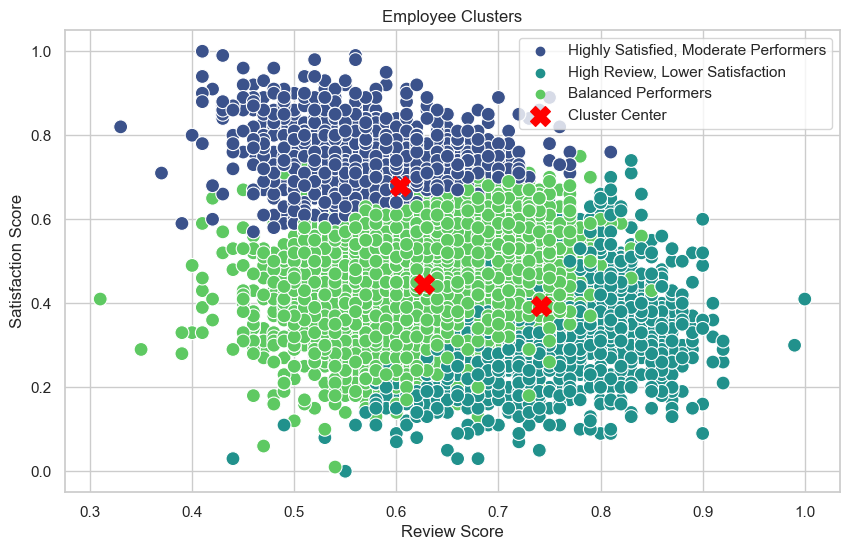

In [24]:
# Fitting KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
churn_analysis_df['cluster'] = kmeans.fit_predict(X_scaled)

# Defining cluster labels and corresponding labels
cluster_labels = ['Balanced Performers', 'High Review, Lower Satisfaction', 'Highly Satisfied, Moderate Performers']
churn_analysis_df['cluster_label'] = churn_analysis_df['cluster'].map(dict(enumerate(cluster_labels)))

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review', y='satisfaction', hue='cluster_label', data=churn_analysis_df, palette='viridis', s=100)

# Plotting cluster centers
centers = churn_analysis_df.groupby('cluster_label').mean()
plt.scatter(centers['review'], centers['satisfaction'], c='red', marker='X', s=200, label='Cluster Center')

# Customizing the plot
plt.title('Employee Clusters')
plt.xlabel('Review Score')
plt.ylabel('Satisfaction Score')
plt.legend()
plt.grid(True)
plt.show()


#### 8.5 Cluster Profiles

Delving deeper into our clusters, we compute and display the mean values for each feature within every cluster. These cluster profiles offer a comprehensive understanding of the distinctive characteristics defining each cluster, shedding light on the patterns and trends uncovered through our clustering analysis.

In [25]:
# Calculating the mean for each feature within each cluster
cluster_profiles = churn_analysis_df.groupby('cluster')[features].mean().round(2)

# Displaying the cluster profiles
print(cluster_profiles)

         review  satisfaction  avg_hrs_month
cluster                                     
0          0.63          0.45         188.31
1          0.74          0.39         182.00
2          0.60          0.68         182.32


#### 8.6 Cluster Size Visualization

Visualizing the size of each cluster adds another layer of insight to our analysis. A count plot illustrates the distribution of employees across different clusters, providing a glimpse into the relative proportions of each identified employee segment.

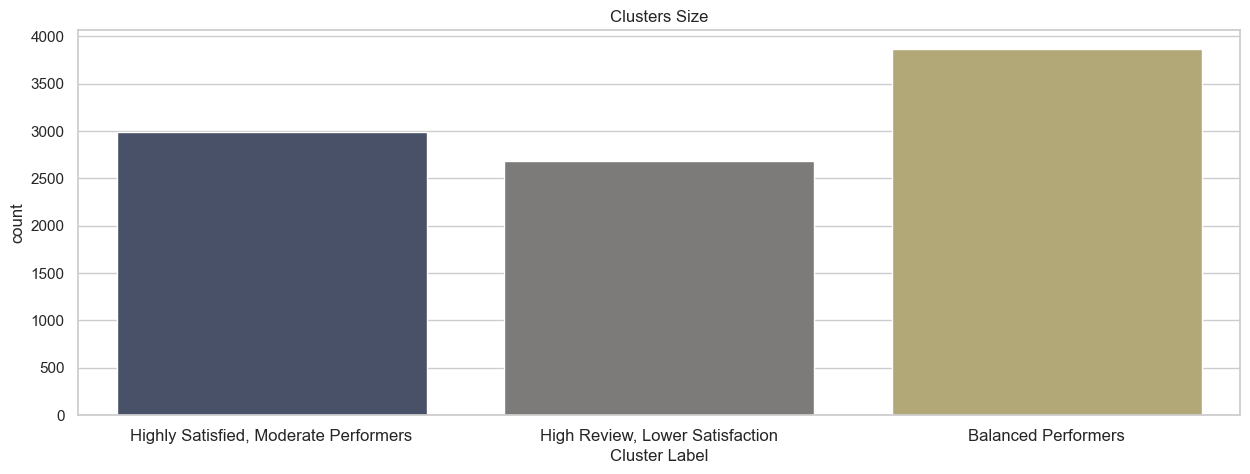

There are 2989 employees (31.33% of total employees) in the Highly Satisfied, Moderate Performers group.

There are 2680 employees (28.09% of total employees) in the High Review, Lower Satisfaction group.

There are 3871 employees (40.58% of total employees) in the Balanced Performers group.



In [26]:
# Plotting the count of employees in each cluster
plt.figure(figsize=(15, 5))
sns.countplot(data=churn_analysis_df, x='cluster_label', palette='cividis')

# Customizing the plot
plt.title('Clusters Size')
plt.xticks(fontsize=12)
plt.xlabel('Cluster Label')

# Displaying the plot
plt.show()

# Number of employees in each cluster
for cluster_label in churn_analysis_df['cluster_label'].unique():
    # Extracting data for the current cluster
    cluster_data = churn_analysis_df.loc[churn_analysis_df['cluster_label'] == cluster_label]
    
    # Printing the number of employees and percentage in the current cluster
    print(f"There are {len(cluster_data)} employees ({round(len(cluster_data) / len(churn_analysis_df) * 100, 2)}% of total employees) in the {cluster_label} group.\n")

#### 8.7 Employee Distribution within Clusters

To bridge the gap between clusters and employee turnover, we explore the distribution of employees within each cluster. The count plot breaks down the percentage of employees who left or stayed within each cluster, offering nuanced insights into the relationship between clusters and turnover.

C:\Users\User\AppData\Local\Temp\ipykernel_8672\3079522422.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percentages = churn_analysis_df.groupby(['cluster_label', 'left']).size().unstack() / total_per_cluster[:, None]



Percentage breakdown for the 'left' column in each cluster:
left                                          0         1
cluster_label                                            
Balanced Performers                    0.746835  0.253165
High Review, Lower Satisfaction        0.552985  0.447015
Highly Satisfied, Moderate Performers  0.797257  0.202743


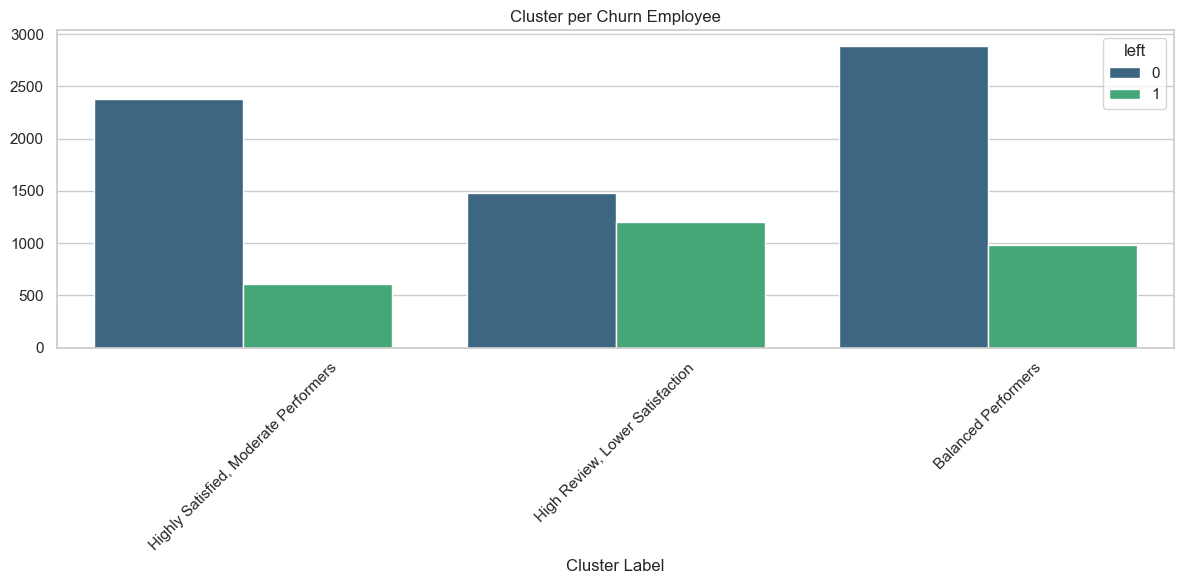

In [28]:
# Creating a subplot for binary feature count per cluster
plt.figure(figsize=(12, 6))

# Plotting count of binary feature per cluster
sns.countplot(data=churn_analysis_df, x='cluster_label', hue='left', palette='viridis')

# Customizing subplot labels and title
plt.ylabel('')
plt.xlabel('Cluster Label')
plt.title('Cluster per Churn Employee')
plt.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Calculating and displaying percentages
total_per_cluster = churn_analysis_df.groupby('cluster_label').size()
percentages = churn_analysis_df.groupby(['cluster_label', 'left']).size().unstack() / total_per_cluster[:, None]

print(f"\nPercentage breakdown for the 'left' column in each cluster:")
print(percentages)

# Adjusting layout and displaying the subplot
plt.tight_layout()
plt.show()

#### 8.8 Departmental Turnover Analysis

Further enriching our analysis, we delve into department-specific turnover within clusters. Top departments witnessing turnover and their corresponding counts are identified. This granular exploration allows us to understand how turnover is distributed across different departments within the organization.

In [42]:
# Analyzing the top 3 turnover count per departments
top3_departments_count = churn_analysis_df.loc[churn_analysis_df['left'].isin([1])].groupby('department')['left'].sum().nlargest(3)
print("Top 3 Departments for Those Who Left:")
print(top3_departments_count)

Top 3 Departments for Those Who Left:
department
sales          537
retail         471
engineering    437
Name: left, dtype: int64


#### 8.9 Cluster-Specific Employee Insights

To provide actionable insights, we conduct a detailed examination of the top three clusters identified in our analysis. For each cluster, we analyze turnover counts, average tenure, job satisfaction, performance reviews, and average working hours. This cluster-specific breakdown facilitates targeted interventions and strategies tailored to the unique characteristics of each employee segment.

In [44]:
# Analyzing turnover for 'Balanced Performers'
balanced_performers = churn_analysis_df.loc[churn_analysis_df['cluster_label'].isin(['Balanced Performers']) & churn_analysis_df['left'].isin([1])]
print("\nBalanced Performers:\n")
balanced_performers_count = balanced_performers.groupby('department')['left'].sum()
print(balanced_performers_count.nlargest(3))
print("\nAverage Tenure:", round(balanced_performers['tenure'].mean(), 2))
print("Average Satisfaction:", round(balanced_performers['satisfaction'].mean(), 2))
print("Average Review:", round(balanced_performers['review'].mean(), 2))
print("Average Working Hours:", round(balanced_performers['avg_hrs_month'].mean(), 2))

# Analyzing turnover for 'High Review, Lower Satisfaction'
high_review_lower_satisfaction = churn_analysis_df.loc[churn_analysis_df['cluster_label'].isin(['High Review, Lower Satisfaction']) & churn_analysis_df['left'].isin([1])]
print("\nHigh Review, Lower Satisfaction:\n")
high_review_lower_satisfaction_count = high_review_lower_satisfaction.groupby('department')['left'].sum()
print(high_review_lower_satisfaction_count.nlargest(3))
print("\nAverage Tenure:", round(high_review_lower_satisfaction['tenure'].mean(), 2))
print("Average Satisfaction:", round(high_review_lower_satisfaction['satisfaction'].mean(), 2))
print("Average Review:", round(high_review_lower_satisfaction['review'].mean(), 2))
print("Average Working Hours:", round(high_review_lower_satisfaction['avg_hrs_month'].mean(), 2))

# Analyzing turnover for 'Highly Satisfied, Moderate Performers'
highly_satisfied_moderate_performers = churn_analysis_df.loc[churn_analysis_df['cluster_label'].isin(['Highly Satisfied, Moderate Performers']) & churn_analysis_df['left'].isin([1])]
print("\nHighly Satisfied, Moderate Performers:\n")
highly_satisfied_moderate_performers_count = highly_satisfied_moderate_performers.groupby('department')['left'].sum()
print(highly_satisfied_moderate_performers_count.nlargest(3))
print("\nAverage Tenure:", round(highly_satisfied_moderate_performers['tenure'].mean(), 2))
print("Average Satisfaction:", round(highly_satisfied_moderate_performers['satisfaction'].mean(), 2))
print("Average Review:", round(highly_satisfied_moderate_performers['review'].mean(), 2))
print("Average Working Hours:", round(highly_satisfied_moderate_performers['avg_hrs_month'].mean(), 2))


Balanced Performers:

department
sales         190
retail        162
operations    161
Name: left, dtype: int64

Average Tenure: 7.74
Average Satisfaction: 0.51
Average Review: 0.65
Average Working Hours: 187.94

High Review, Lower Satisfaction:

department
sales          231
retail         199
engineering    194
Name: left, dtype: int64

Average Tenure: 5.42
Average Satisfaction: 0.39
Average Review: 0.77
Average Working Hours: 181.24

Highly Satisfied, Moderate Performers:

department
sales         116
retail        110
operations     90
Name: left, dtype: int64

Average Tenure: 7.0
Average Satisfaction: 0.71
Average Review: 0.6
Average Working Hours: 186.4


## 9. 📝 Conclusion

After an extensive exploration of data analysis, model training, and meticulous track selection, we are now poised to address key questions.

#### 9.1 Departmental Turnover Analysis
_**Which department has the highest employee turnover? Which one has the lowest?**_

In our examination of employee turnover, the Sales department emerged with the highest turnover, witnessing 537 departures. It was closely followed by the Retail and Engineering departments, with 471 and 437 departures, respectively. To gain deeper insights, we further scrutinized specific clusters based on employee characteristics.

#### 9.1.1 Balanced Performers
Within the "Balanced Performers" cluster, encompassing departments like Sales, Retail, and Operations, Sales continued to be a significant contributor to turnover, with 190 departures. Retail and Operations closely followed, recording 162 and 161 departures, respectively.

#### 9.1.2 High Review, Lower Satisfaction
In the cluster characterized by high review scores but lower satisfaction, Sales again stood out with the highest turnover, witnessing 231 departures. Retail and Engineering followed suit with 199 and 194 departures, respectively.

#### 9.1.3 Highly Satisfied, Moderate Performers
Exploring the cluster of highly satisfied employees with moderate performance, Sales maintained prominence with 116 departures. Retail and Operations also featured prominently, with 110 and 90 departures, respectively.

In summary, Sales consistently held the distinction of having the highest turnover across various clusters, closely trailed by Retail and Operations. While Engineering secured a spot in the top three overall, its ranking varied across different employee clusters.

#### 9.2 Predictor Variable Exploration
_**Investigate which variables seem to be better predictors of employee departure.**_

Our investigation into predictor variables unveiled critical insights. Performance review scores (review) emerged as the most consistent and influential predictor in both linear and logistic regression models. It consistently held the top position across different employee clusters, highlighting its robust association with employee departures. Additionally, average monthly hours worked (avg_hrs_month) demonstrated significance, securing the second and third positions in linear and logistic regression, respectively. Job satisfaction (satisfaction) consistently appeared among the top three predictors, emphasizing its role in influencing employee turnover.

#### 9.3 Recommendations for Reducing Employee Turnover

While the ideal turnover rate is generally considered to be 10% or lower for maintaining a stable labor force, our analysis uncovered a higher-than-average turnover rate of around 30%. This indicates a critical need for strategic interventions to address employee retention. The breakdown across different clusters and departments provides valuable insights for tailoring recommendations.

**Overall Strategy:**
The company should focus on implementing a comprehensive employee retention strategy, addressing key factors influencing turnover. A holistic approach should include measures to enhance job satisfaction, provide growth opportunities, and recognize and reward high performers.

**Balanced Performers:**

- `Identify and Acknowledge High Performers:` Recognize and reward employees in the Sales, Retail, and Operations departments for their contributions.
- `Promotions and Bonuses:` Increase the annual promotions rate and consider introducing additional bonuses for outstanding performance.
- `Career Development:` Establish clear career progression paths and communicate growth opportunities within the organization.
- `Enhanced Benefits:` Review and enhance benefits packages, considering factors beyond monetary compensation.

**High Review, Lower Satisfaction:**

- `Performance-Linked Incentives:` Implement performance-linked incentives, such as performance-based bonuses and promotions.
- `Satisfaction Surveys:` Conduct regular satisfaction surveys to understand and address specific concerns affecting job satisfaction.
- `Work-Life Balance:` Explore initiatives to improve work-life balance, considering the impact of working hours on employee satisfaction.
- `Leadership Development:` Provide leadership development programs to enhance the skills and satisfaction of employees in Engineering, Sales, and Retail.

**Highly Satisfied, Moderate Performers:**

- `Recognition Programs:` Implement employee recognition programs to acknowledge the efforts of highly satisfied employees.
- `Performance-Driven Rewards:` Introduce rewards aligned with performance metrics to motivate moderate performers.
- `Training Opportunities: Offer training opportunities to enhance the skills and capabilities of employees in Sales, Retail, and Operations.
- `Flexible Working Conditions:` Consider flexible working arrangements to accommodate the preferences of highly satisfied employees.

**Company-Wide Initiatives:**

- `Meritocracy System:` Establish a robust meritocracy system to ensure that promotions and rewards are based on performance and contributions.
- `Communication Channels:` Enhance communication channels to keep employees informed about organizational developments and opportunities.
- `Regular Feedback:` Implement regular feedback mechanisms to address concerns and proactively identify areas for improvement.
- `Competitive Salaries:` Regularly review and adjust salary structures to remain competitive in the industry.